# Load the dataset

In [338]:
import pandas as pd

df = pd.read_csv("spam_ham_dataset.csv")

In [339]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [341]:
#example of a spam email
df["text"][5170]

'Subject: important online banking alert\r\ndear valued citizensr bank member ,\r\ndue to concerns , for the safety and integrity of the online banking community we have issued the following warning message .\r\nit has come to our attention that your citizensr bank account information needs to be updated as part of our continuing commitment to protect your account and to reduce the instance of fraud on our website . if you could please take 5 - 10 minutes out of your online experience and renew your records you will not run into any future problems with the online service . however , failure to confirm your records may result in your account suspension .\r\nonce you have confirmed your account records your internet banking service will not be interrupted and will continue as normal .\r\nto confirm your bank account records please click here .\r\nnote :\r\nthis e - mail was sent on behalf of the online banking community , if you do not have an online banking account with charterr one th

In [342]:
#example of ham email
df["text"][2]

"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up

In [343]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [344]:
#we dont need the label as it is already indicated with 0 and 1
# 0 = ham
# 1 = spam
#unnamed: 0 is not useful for the training --> DROP!!
df = df.drop(columns=['Unnamed: 0', 'label'])

In [345]:
#wohoo the 2 columns are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [346]:
df.head(5)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [347]:
# we have to rename the column label_num into target
df.rename(columns={'label_num': 'target'}, inplace=True)
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


# EDA

In [348]:
target_counts = df['target'].value_counts()
print(target_counts)

target
0    3672
1    1499
Name: count, dtype: int64


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   target  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [350]:
# as the text is an int we need to change to str
df['text'] = df['text'].apply(lambda x: str(x) if not isinstance(x, str) else x)
df['text'] = df['text'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   target  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


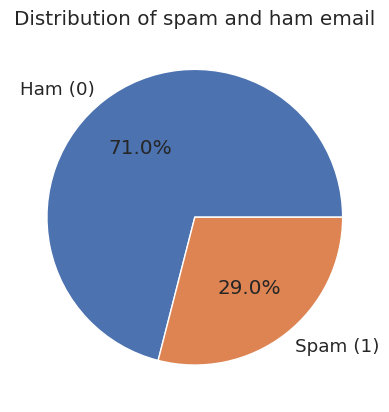

In [351]:
# bar chart for spam vs ham email
import matplotlib.pyplot as plt

target_counts = df['target'].value_counts()

plt.pie(target_counts.values, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%')

plt.title('Distribution of spam and ham email')

plt.show()

# the distribution of spam and ham email is ca va not super imbalance

In [352]:
# text length analysis by no. of sentence and wordcount in a text n so we can sperate into 0 and 1 to see the charaterstic of it

import nltk

nltk.download('punkt_tab')

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          5171 non-null   object
 1   target        5171 non-null   int64 
 2   num_words     5171 non-null   int64 
 3   num_sentence  5171 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 161.7+ KB


In [354]:
#ham
df[df['target'] == 0][['num_words', 'num_sentence']].describe()

,num_words,num_sentence
count,3672.000000,3672.000000
mean,226.239107,11.440904
std,332.179661,24.892442
min,3.000000,1.000000
25%,51.000000,3.000000
50%,124.000000,6.000000
75%,294.000000,13.000000
max,8863.000000,1204.000000


In [355]:
#spam
df[df['target'] == 1][['num_words', 'num_sentence']].describe()

,num_words,num_sentence
count,1499.000000,1499.000000
mean,236.387592,17.237492
std,346.821249,32.796043
min,2.000000,1.000000
25%,55.000000,4.000000
50%,116.000000,9.000000
75%,244.000000,18.500000
max,3963.000000,693.000000


In [356]:
# in averge, the spam email has more words and more sentences.

In [357]:
import string
special_chars = string.punctuation

df['special_chars'] = df['text'].str.count(f'[{special_chars}]')

avg_spam_special_chars = df[df['target'] == 1]['text'].str.count(f'[{special_chars}]').mean()
avg_ham_special_chars = df[df['target'] == 0]['text'].str.count(f'[{special_chars}]').mean()

print(f"Average special characters in spam emails: {avg_spam_special_chars:.2f}")
print(f"Average special characters in ham emails: {avg_ham_special_chars:.2f}")

Average special characters in spam emails: 50.15
Average special characters in ham emails: 70.08


In [358]:
#is surprising that there are more special characters in ham email more than spam

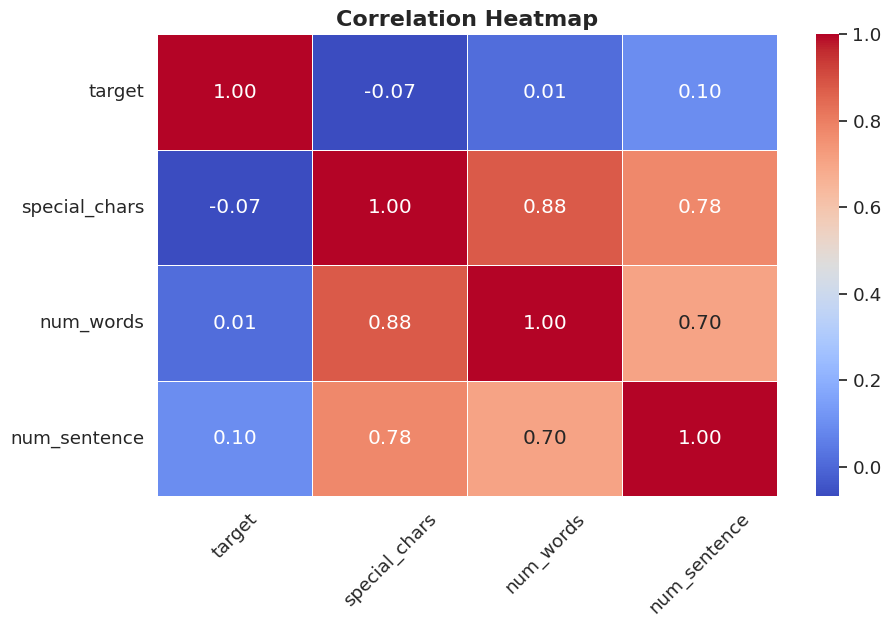

In [359]:
import seaborn as sns
correlation_matrix = df[['target', 'special_chars', 'num_words', 'num_sentence']].corr()

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

In [360]:
# Emails with more sentences tend to have more words and more special characters.... (seems like a common sense?)
# None of these features individually are strong predictors of whether an email is spam or not (;-;)

# Data cleaning


In [361]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.info())

text             0
target           0
num_words        0
num_sentence     0
special_chars    0
dtype: int64
178
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           5171 non-null   object
 1   target         5171 non-null   int64 
 2   num_words      5171 non-null   int64 
 3   num_sentence   5171 non-null   int64 
 4   special_chars  5171 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 202.1+ KB
None


In [362]:
# parfait
# there is no missing values/duplicated

In [363]:
df.head()
#as we can see there are subjects in the text, so we need to sperate it from the text column

,text,target,num_words,num_sentence,special_chars
0,Subject: enron methanol ; meter # : 988291\r\n...,0,68,3,15
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,24,3,8
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,551,24,82
3,"Subject: photoshop , windows , office . cheap ...",1,49,3,5
4,Subject: re : indian springs\r\nthis deal is t...,0,71,3,7


In [364]:
subjects = []
for i in range(len(df)):
    ln = df["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [365]:
df['subject'] = subjects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           5171 non-null   object
 1   target         5171 non-null   int64 
 2   num_words      5171 non-null   int64 
 3   num_sentence   5171 non-null   int64 
 4   special_chars  5171 non-null   int64 
 5   subject        5171 non-null   object
dtypes: int64(4), object(2)
memory usage: 242.5+ KB


In [366]:
# to remove all subject in the text
import re
df["text"] = df["text"].str.replace(r'^subject:.*(\n|$)', '', flags=re.IGNORECASE, regex=True)
#.* → match everything after it (the actual subject content)
#(\n|$) → until the first newline or end of the string

In [367]:
df.head()
#daaaaa and now is sperated

,text,target,num_words,num_sentence,special_chars,subject
0,this is a follow up to the note i gave you on ...,0,68,3,15,: enron methanol ; meter # : 988291
1,( see attached file : hplnol 09 . xls )\r\n- h...,0,24,3,8,": hpl nom for january 9 , 2001"
2,"ho ho ho , we ' re around to that most wonderf...",0,551,24,82,: neon retreat
3,abasements darer prudently fortuitous undergon...,1,49,3,5,": photoshop , windows , office . cheap . main ..."
4,this deal is to book the teco pvr revenue . it...,0,71,3,7,: re : indian springs


In [368]:
# we also need to :
#change uppercase letters to lowercase: Prevents duplication of word representations
#delete punctuation marks: has no semantic value
#delete stopwords: appear everywhere
#delete numbers: not useful/meaningful

In [369]:
#covert to lowercase letters
df["text"] = df["text"].str.lower()
df["text"][1]

'( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [370]:
#delete punctuation marks
import string

df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df["text"][1]

' see attached file  hplnol 09  xls \r\n hplnol 09  xls'

In [371]:
#delete stopwords
# i found the NLTK online as it is sth ive not learnt yet...
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df["text"] = df["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

df["text"][1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'see attached file hplnol 09 xls hplnol 09 xls'

In [372]:
#delete numbers
df["text"] = df["text"].str.replace(r'\d+', '', regex=True)
df["text"][1]

'see attached file hplnol  xls hplnol  xls'

In [373]:
#top 10 words
from collections import Counter

spam_texts = df[df['target'] == 1]['text']


all_spam = ' '.join(spam_texts)
words = all_spam.split()


word_counts = Counter(words)


top_10 = word_counts.most_common(10)

for word, freq in top_10:
    print(f"{word}: {freq}")


com: 990
http: 983
company: 723
e: 606
www: 587
information: 513
font: 511
td: 504
statements: 476
please: 473


In [374]:
# we can see in spam email, mostly there are wordings like com,http,www, which are url!!

In [375]:
#do the same for ham email
spam_texts = df[df['target'] == 0]['text']

all_spam = ' '.join(spam_texts)
words = all_spam.split()

word_counts = Counter(words)

top_10 = word_counts.most_common(10)

for word, freq in top_10:
    print(f"{word}: {freq}")


ect: 13893
hou: 7281
enron: 6279
subject: 2728
please: 2697
com: 2693
deal: 2655
gas: 2629
cc: 2357
pm: 2325


In [376]:
# these words are mostly the short form of some words while texting: pm = private message

In [377]:
df = df.drop(['subject'], axis=1)

In [378]:
df.head()

,text,target,num_words,num_sentence,special_chars
0,follow note gave monday preliminary flow da...,0,68,3,15
1,see attached file hplnol xls hplnol xls,0,24,3,8
2,ho ho ho around wonderful time year neon leade...,0,551,24,82
3,abasements darer prudently fortuitous undergon...,1,49,3,5
4,deal book teco pvr revenue understanding teco ...,0,71,3,7


# Preprocess


In [379]:
X = df.drop(["target"], axis =1)
y = df['target']

In [380]:
#split into testing and training set
#as we know the test set is not thaaaaat balance (30% vs 70%), therefore I decided split the data to 70% training, 15% validation and 15% test set

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

In [381]:
# Separate columns
X_text = X["text"]
X_extra = X[["num_words", "num_sentence","special_chars"]]

In [382]:
import numpy as np

spam_emails = df[df['target'] == 1]['text']
spam_email_lengths = [len(email.split()) for email in spam_emails]

max_length = int(np.percentile(spam_email_lengths, 95))
print(max_length)

478


In [383]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text)

X_train_sequences = tokenizer.texts_to_sequences(X_train["text"])
X_val_sequences = tokenizer.texts_to_sequences(X_val["text"])
X_test_sequences = tokenizer.texts_to_sequences(X_test["text"])


In [384]:
import tensorflow as tf

vect = tf.keras.layers.TextVectorization(
    max_tokens=5000,
    output_mode='int',
    output_sequence_length=100
)

vect.adapt(X_train['text'].to_numpy())

X_train_vect = vect(X_train["text"].to_numpy())
X_val_vect = vect(X_val["text"].to_numpy())
X_test_vect = vect(X_test["text"].to_numpy())

In [385]:
#make sure is well done
print(type(X_train_vect))
print(X_train_vect.shape)
print(X_train_vect[:5])

<class 'tensorflow.python.framework.ops.EagerTensor'>
(3619, 100)
tf.Tensor(
[[  56   49  134   28    1  669   83   12 3482   17    1    1  474  354
    47  113   12    1 1709    1  380  278  504    1    1   12  116 3831
  1760    1   12 4094 1484 4072    6   12    1    1    1 2638  217   47
   113 2423  262  507   12 3257    1 2349 2293  103    6   81 2733 2437
   103    6 4072   33   50   47 2293   41 3683 2733 2437   41  755  132
    58  633  161 2293   41 2733 2437   41  188  862   12    1    1 3921
    53  217   33   50   47  113 2423  262  507  125  447   57  131   22
   561 2575]
 [ 148  644  627  666  101    9  331  498  271  113    9    1 1203    1
     1   73  733  896  718   73  106  309   97  218  441   55  222  318
     1   29  337 1764  466   22  182    1   41 4042   31   18  204 2864
     1  665    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0

In [386]:
from sklearn.preprocessing import StandardScaler

X_train_extra = X_train[["num_words", "num_sentence", "special_chars"]]
X_val_extra = X_val[["num_words", "num_sentence", "special_chars"]]
X_test_extra = X_test[["num_words", "num_sentence", "special_chars"]]

scaler = StandardScaler()
scaler.fit(X_train_extra)


X_train_extra_scaled = scaler.transform(X_train_extra)
X_val_extra_scaled = scaler.transform(X_val_extra)
X_test_extra_scaled = scaler.transform(X_test_extra)

X_train_extra_scaled = pd.DataFrame(X_train_extra_scaled, columns=X_train_extra.columns, index=X_train_extra.index)
X_val_extra_scaled = pd.DataFrame(X_val_extra_scaled, columns=X_val_extra.columns, index=X_val_extra.index)
X_test_extra_scaled = pd.DataFrame(X_test_extra_scaled, columns=X_test_extra.columns, index=X_test_extra.index)

In [387]:
# #now lets combine the X_extra and the X_train_vect tgh
# import tensorflow as tf

# X_train_pp = tf.concat([X_train_vect, X_train_extra_scaled], axis=1)
# X_val_pp = tf.concat([X_val_vect, X_val_extra_scaled], axis=1)
# X_test_pp = tf.concat([X_test_vect, X_test_extra_scaled], axis=1)
#trial5: get rid of the X_extra n train to see if there is less overfitting

In [388]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df['target'])

df['target'] = y

In [389]:
df.head()

,text,target,num_words,num_sentence,special_chars
0,follow note gave monday preliminary flow da...,0,68,3,15
1,see attached file hplnol xls hplnol xls,0,24,3,8
2,ho ho ho around wonderful time year neon leade...,0,551,24,82
3,abasements darer prudently fortuitous undergon...,1,49,3,5
4,deal book teco pvr revenue understanding teco ...,0,71,3,7


In [390]:
print(X_train_pp.shape)
print(X_train_pp.dtype)
#ok the dtype now is int64 :)))))

(3619, 103)
<dtype: 'int64'>


In [391]:
#embedding layers: turning words into vector
import tensorflow as tf

vocab_size = vect.vocabulary_size()

embedding_layer = tf.keras.layers.Embedding(
  input_dim=vocab_size,
  output_dim=50,
  mask_zero=True
)

# Model

In [393]:
#LSTM: Best for context/sequence but slower training
# we use sigmoid for binary classification as it will produce value between 0 to 1

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(max_length,)),
    embedding_layer,
    tf.keras.layers.LSTM(32, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 478, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,657 (1018.19 KB)

 Trainable params: 260,657 (1018.19 KB)

 Non-trainable params: 0 (0.00 B)

In [269]:
#trial4: dropout from 0.5 --> 0.6
#trial6: dropour from 0.6 --> 0.7

In [270]:
#trial1:at first i put 0.2 as the drop out, but then i change to 0.5 due to overfitting
#trial2:still overfitting so i cnahge to LTSM from 64 to 32 (less layers) --> less complexe

In [394]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

binary_ce = tf.keras.losses.BinaryCrossentropy()
learning_rate = 0.001

model.compile(optimizer = Adam(learning_rate=learning_rate),
              loss = binary_ce,
              metrics = [Precision(), Recall()])

In [395]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#trail3: adding a early stopping so it stops training when it starts to increase, preventing the model from overfitting to the training data.
#trial 3: BATCH SIZE= 32, epochs = 20

In [396]:
history = model.fit(X_train_vect, y_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_data=(X_val_vect, y_val))

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - loss: 1.0109 - precision_14: 0.6471 - recall_14: 0.3384 - val_loss: 0.3447 - val_precision_14: 0.8078 - val_recall_14: 0.9156
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.2629 - precision_14: 0.8890 - recall_14: 0.9018 - val_loss: 0.1882 - val_precision_14: 0.8814 - val_recall_14: 0.9244
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 0.1583 - precision_14: 0.9388 - recall_14: 0.9357 - val_loss: 0.1543 - val_precision_14: 0.8916 - val_recall_14: 0.9867
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.1168 - precision_14: 0.9481 - recall_14: 0.9897 - val_loss: 0.2282 - val_precision_14: 0.7979 - val_recall_14: 1.0000
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.1261 - precision_14: 0.9162 - recall_14: 0.9969 - val_loss: 0.1237 - val_precision_14: 0.9362 - val_recall_14: 0.9778
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0942 - precision_14: 0.9775 - 

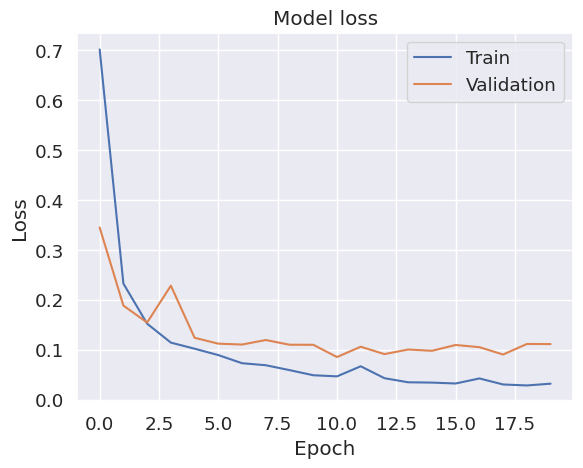

In [397]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [398]:
y_pred_labels = model.predict(X_val_vect)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [399]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_val_vect)

y_pred_labels = (y_pred > 0.3).astype(int)

accuracy = accuracy_score(y_val, y_pred_labels)
precision = precision_score(y_val, y_pred_labels)
recall = recall_score(y_val, y_pred_labels)
f1 = f1_score(y_val, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9755154639175257
Precision: 0.9439655172413793
Recall: 0.9733333333333334
F1 Score: 0.9584245076586433


In [400]:
y_pred_probs_test = model.predict(X_test_vect)
y_pred_labels_test = (y_pred_probs_test > 0.3).astype(int)


from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_pred_labels_test)
print(f"F1 Score on Test Set: {f1_test}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
F1 Score on Test Set: 0.954248366013072


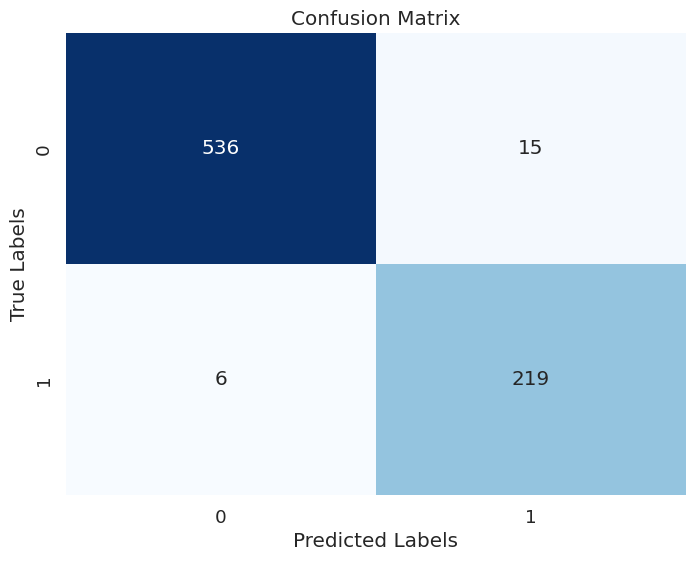

In [401]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred_labels_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()